# Pymaceuticals Inc.
---

### Analysis
* Based on the researches, we can see that Capomulin can be a realiable drug regimen to reduce tumor growth.
* Capomulin had the highest number of of mice completed the study compare to all other regimens. The other drugs resulted in higher number of mice death.
* We can conclude that, there is a strong relationship btw mouse weight and tumor volume. This can be indication that the mouse weight may contribute to the effectivenesss of drug regimen overall.
* As it indicates in the box plot, there was only one potential outlier within the Infubinol regimen. There was only one mouse did have reduction in the tumor growth during this study while the rest of the mice showed increase in tumor volume. 
  


In [33]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


#Study data files 
mouse_metadata_path = ("Pymaceuticals/data/Mouse_metadata.csv")
study_results_path = ("Pymaceuticals/data/Study_results.csv")

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame

study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice
total_mouse = len(study_data_complete["Mouse ID"].unique())
total_mouse

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_data_complete_df = pd.DataFrame(study_data_complete)

duplicate_mouse_id = study_data_complete_df[study_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicated_data = study_data_complete_df[study_data_complete_df["Mouse ID"].isin(duplicate_mouse_id)]
duplicated_data     

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
#Create a clean DataFrame by dropping the duplicated Mouse ID
clean_study_data_complete_df = study_data_complete_df[~study_data_complete_df["Mouse ID"].isin(duplicate_mouse_id)]
clean_study_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice in the clean DataFrame.
total_unique_mouse = len(clean_study_data_complete_df["Mouse ID"].unique())
total_unique_mouse

248

# Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = clean_study_data_complete_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_study_data_complete_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_var = clean_study_data_complete_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_study_data_complete_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_study_data_complete_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
Stat_Summary_Drug = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,"Median Tumor Volume":tumor_volume_median,
                                  "Tumor Volume Variance":tumor_volume_var,"Tumor Volume Std. Dev.":tumor_volume_std,
                                  "Tumor Volume Std. Err.":tumor_volume_sem})
Stat_Summary_Drug                                  


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Using the aggregation method, produce the same summary statistics in a single line

Agg_Stat_Summary_Drug = {'Tumor Volume (mm3)': ['mean','median','var','std','sem']}

Agg_Stat_Summary_Drug_Table = clean_study_data_complete_df.groupby("Drug Regimen").agg(Agg_Stat_Summary_Drug)

Agg_Stat_Summary_Drug_Table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

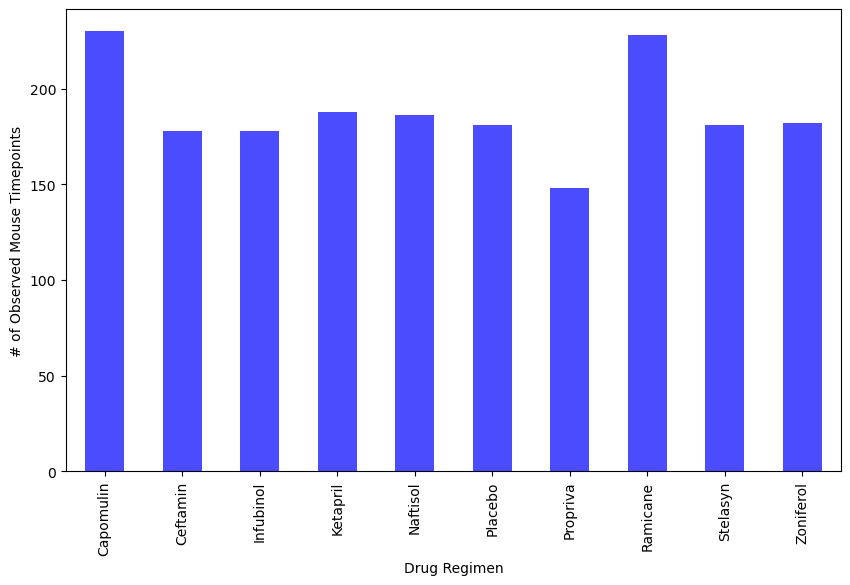

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_drug_regimen_count = clean_study_data_complete_df.groupby(["Drug Regimen"]).size()
total_drug_regimen_count_df = total_drug_regimen_count.to_frame()
total_drug_regimen_count.plot(kind='bar', color = 'blue', alpha=0.7, figsize=(10,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

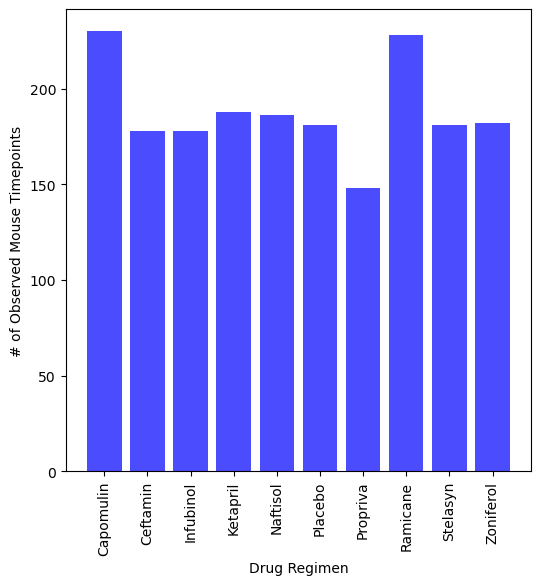

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6,6))
plt.bar(total_drug_regimen_count_df.index, total_drug_regimen_count_df[0], color='blue', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


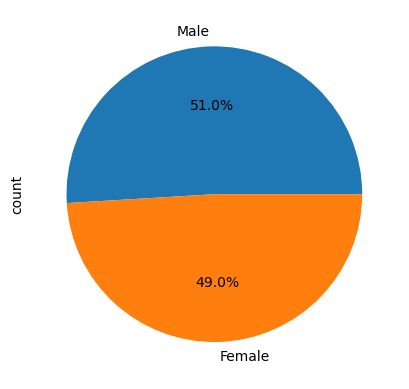

In [42]:
# Generate a pie chart, using Matplotlib, showing the distribution of unique female versus male mice used in the study
total_sex_count = clean_study_data_complete_df['Sex'].value_counts()
total_sex_count_df=total_sex_count.to_frame()
# Get the unique mice with their gender

total_sex_count
total_sex_count.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

# # Make the pie chart


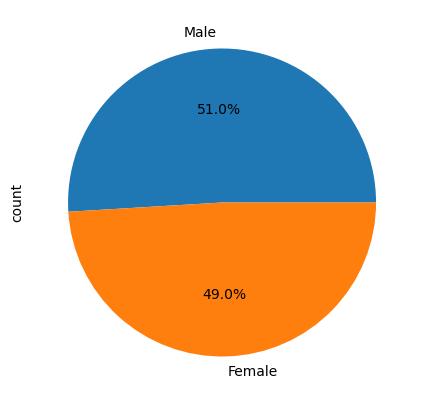

In [43]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pieplot = total_sex_count.plot.pie(autopct='%1.1f%%', figsize = (5,5), subplots=True)

# Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_df = clean_study_data_complete_df[clean_study_data_complete_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = four_treatments_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(grouped_df, four_treatments_df, on=["Mouse ID", "Timepoint"], how="inner")
tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}
quartiles = {}
append_list =[]
# Loop through each drug in the treatment list
for drug in treatment_list:
    drug_data = tumor_volume_df.loc[tumor_volume_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
    # tumor_vol_data[drug] = drug_data['Tumor Volume (mm3)'].to_list()
   
    quartiles[drug] = drug_data.quantile([.25, .5, .75])
    
    lowerq = quartiles[drug][0.25]
    upperq = quartiles[drug][.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # list = append_list.append(tumor_vol_data[drug])
 
    outliers = drug_data.loc[(drug_data < lower_bound)|(drug_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


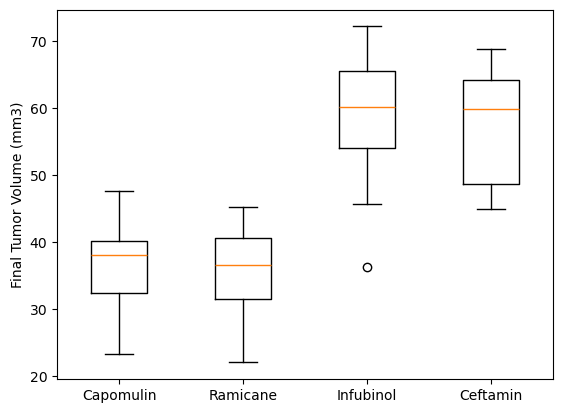

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatment_list:
    # tumor_vol_data[drug]  = tumor_volume_df[tumor_volume_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]  
    tumor_vol_data.append(tumor_volume_df[tumor_volume_df["Drug Regimen"] ==drug]["Tumor Volume (mm3)"].values) 

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatment_list)
plt.show()  
  


## Line and Scatter Plots

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# capomulin_mouse= clean_study_data_complete_df[clean_study_data_complete_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_mouse = study_data_complete[study_data_complete["Mouse ID"]=='r944']
capomulin_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
239,r944,0,45.000000,0,Capomulin,Male,12,25
432,r944,5,45.737145,0,Capomulin,Male,12,25
630,r944,10,46.544292,0,Capomulin,Male,12,25
761,r944,15,47.373423,0,Capomulin,Male,12,25
1001,r944,20,43.225671,1,Capomulin,Male,12,25
1118,r944,25,41.086991,1,Capomulin,Male,12,25
1412,r944,30,41.680791,1,Capomulin,Male,12,25
1556,r944,35,40.401765,2,Capomulin,Male,12,25
1650,r944,40,41.042045,2,Capomulin,Male,12,25
1888,r944,45,41.581521,2,Capomulin,Male,12,25


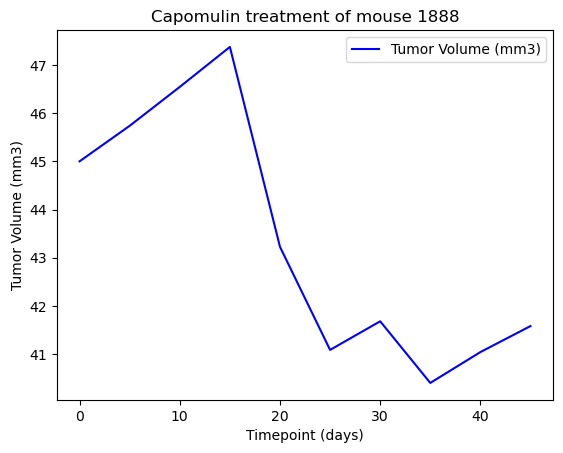

In [49]:
capomulin_mouse_line = capomulin_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)',
                                            title='Capomulin treatment of mouse 1888', color = "blue")
plt.show()

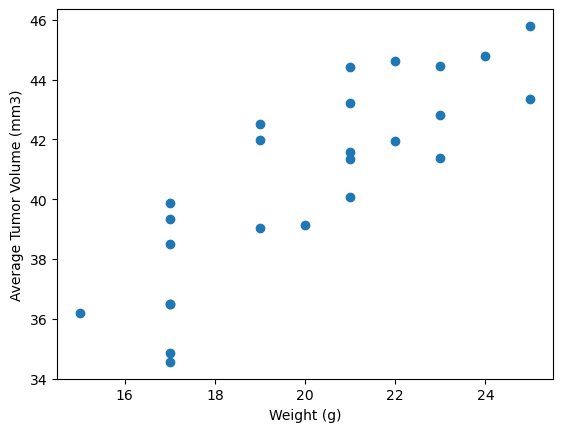

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_treatment2 = study_data_complete[study_data_complete["Drug Regimen"]=='Capomulin']
# capomulin_treatment2
capomulin_treatment = study_data_complete [study_data_complete["Drug Regimen"].isin(["Capomulin"])]

capomulin_tumor = capomulin_treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weight = capomulin_treatment.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_weight_df = capomulin_weight.to_frame()
capomulin_tumor_df = capomulin_tumor.to_frame()

plt.scatter(capomulin_weight_df, capomulin_tumor_df )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


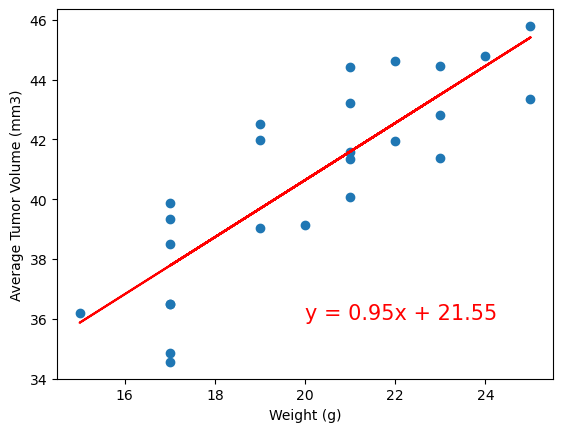

In [51]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_weight_df["Weight (g)"]
y_values = capomulin_tumor_df["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize = 15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()